## A Small Notebook Demonstrating Castor's Meridian Contrast Overlay Creation



In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from preprocess import *
from preprocess import _normalize_array

from analysis import *
import unpack


211026-12:26:03,219 nipype.utils WARNING:
	 A newer version (1.7.0) of nipy/nipype is available. You are using 1.6.1


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Unpack dicoms

In [2]:
dicomDir = '/Users/loggiasr/Projects/fmri/monkey_fmri/wooster_merridian_list_mgh4chan'
sessDir = '/Users/loggiasr/Projects/fmri/monkey_fmri/WoosterMerridianMGH4CHAN/functional'
unpack.unpack(dicomDir, sessDir)
SOURCE = 

Chris Rorden's dcm2niiX version v1.0.20211006  Clang13.0.0 x86-64 (64-bit MacOS)
Found 192 DICOM file(s)
Convert 192 DICOM as /Users/loggiasr/Projects/fmri/monkey_fmri/WoosterMerridianMGH4CHAN/functional/ep2d_bold_1.2mm_p2s2_HF_20211022132356_4_Wooster (128x100x42x192)
Conversion required 14.921821 seconds (14.712282 for core code).


'Completed'

Here we started with a previously packed nifti file. The first step is to correct the monkey position to sphinx. We'll
als create a new directory for this preprocessing and copy the files over

In [4]:
root = '/Users/loggiasr/Projects/fmri/monkey_fmri/castor_test'
functional_dir = os.path.join(root, 'functional/20100131/')
SOURCE = [os.path.join(functional_dir, f) for f in os.listdir(functional_dir) if f[0] != '.']
print(SOURCE)

['/Users/loggiasr/Projects/fmri/monkey_fmri/castor_test/functional/20100131/015', '/Users/loggiasr/Projects/fmri/monkey_fmri/castor_test/functional/20100131/012', '/Users/loggiasr/Projects/fmri/monkey_fmri/castor_test/functional/20100131/013', '/Users/loggiasr/Projects/fmri/monkey_fmri/castor_test/functional/20100131/014', '/Users/loggiasr/Projects/fmri/monkey_fmri/castor_test/functional/20100131/007', '/Users/loggiasr/Projects/fmri/monkey_fmri/castor_test/functional/20100131/009', '/Users/loggiasr/Projects/fmri/monkey_fmri/castor_test/functional/20100131/008', '/Users/loggiasr/Projects/fmri/monkey_fmri/castor_test/functional/20100131/006', '/Users/loggiasr/Projects/fmri/monkey_fmri/castor_test/functional/20100131/011', '/Users/loggiasr/Projects/fmri/monkey_fmri/castor_test/functional/20100131/016', '/Users/loggiasr/Projects/fmri/monkey_fmri/castor_test/functional/20100131/017', '/Users/loggiasr/Projects/fmri/monkey_fmri/castor_test/functional/20100131/010', '/Users/loggiasr/Projects/f

In [3]:
convert_to_sphinx(SOURCE, fname='f.nii')

210915-12:15:23,511 nipype.interface INFO:
	 stdout 2021-09-15T12:15:23.510964:mri_convert --sphinx --out_type nii --input_volume /Users/loggiasr/Projects/fmri/monkey_fmri/castor_test/functional/20100131/013/f.nii --output_volume /Users/loggiasr/Projects/fmri/monkey_fmri/castor_test/functional/20100131/013/f_sphinx.nii 
210915-12:15:23,560 nipype.interface INFO:
	 stdout 2021-09-15T12:15:23.549284:mri_convert --sphinx --out_type nii --input_volume /Users/loggiasr/Projects/fmri/monkey_fmri/castor_test/functional/20100131/012/f.nii --output_volume /Users/loggiasr/Projects/fmri/monkey_fmri/castor_test/functional/20100131/012/f_sphinx.nii 
210915-12:15:23,794 nipype.interface INFO:
	 stdout 2021-09-15T12:15:23.794342:mri_convert --sphinx --out_type nii --input_volume /Users/loggiasr/Projects/fmri/monkey_fmri/castor_test/functional/20100131/010/f.nii --output_volume /Users/loggiasr/Projects/fmri/monkey_fmri/castor_test/functional/20100131/010/f_sphinx.nii 
210915-12:15:23,796 nipype.interfa

Run FSL Motion Correction

/Users/loggiasr/Projects/fmri/monkey_fmri/preprocess.py:160: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


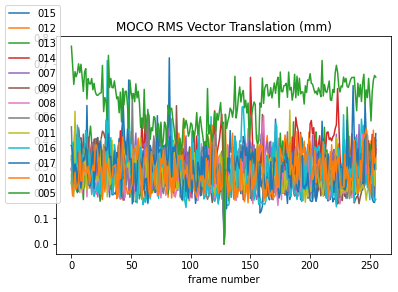

In [4]:
motion_correction(SOURCE, fname='f_sphinx.nii')

In [5]:
# pad the funcitonal data 
functional_to_cube(SOURCE, fname='moco.nii.gz')

96
96
96
96
96
96
96
96
96
96
96
96
96


Now we will downsample our high resolution anatomical for the use in registration. Working with the full size scan is computationally intensive for no reason, and can actually reduce registration accuracy. 

In [3]:
# center_nifti(source_dir=os.path.join(root, 'mri'), fname='orig.mgz')
create_low_res_anatomical(source_dir=os.path.join(root, 'mri'), fname='orig.mgz')

mri_convert /Users/loggiasr/Projects/fmri/monkey_fmri/castor_test/mri/orig.mgz -vs 3 3 3 /Users/loggiasr/Projects/fmri/monkey_fmri/castor_test/mri/low_res.nii 
reading from /Users/loggiasr/Projects/fmri/monkey_fmri/castor_test/mri/orig.mgz...
TR=2500.00, TE=2.99, TI=1100.00, flip angle=8.00
i_ras = (-1, 0, 0)
j_ras = (0, 0, -1)
k_ras = (0, 1, 0)
Reslicing using trilinear interpolation 
writing to /Users/loggiasr/Projects/fmri/monkey_fmri/castor_test/mri/low_res.nii...
mri_convert /Users/loggiasr/Projects/fmri/monkey_fmri/castor_test/mri/low_res.nii -iis 1 -ijs 1 -iks 1 /Users/loggiasr/Projects/fmri/monkey_fmri/castor_test/mri/low_res.nii 
reading from /Users/loggiasr/Projects/fmri/monkey_fmri/castor_test/mri/low_res.nii...
TR=2500.00, TE=0.00, TI=0.00, flip angle=0.00
i_ras = (-1, 0, 0)
j_ras = (0, 0, -1)
k_ras = (0, 1, 0)
writing to /Users/loggiasr/Projects/fmri/monkey_fmri/castor_test/mri/low_res.nii...


Skull Strip the functional and anatomical data. This is done before registration to avoid weird skull artifacts in the
functional from effecting the registration optimization process.

In [4]:
ana_dir = os.path.join(root, 'mri')
skull_strip(SOURCE, fname='f_cubed.nii', is_time_series=True)
skull_strip([ana_dir], fname='low_res.nii', is_time_series=False)

Now we will register the functional data to a detailed anatomical scan using FSL flirt and nirt

This is accomplished by first minimizing the mutual information between the functional and anatomical scan via only linear transforms (rotation, sheer, translation, dilation)

Next the functional and anatomical data are projected into a high dimensional space using a kernel function (default kernel is radial basis) and mutual information is minimized via linear transforms with respect to the kernel space. This results in fine grain deformations to the functional data to better match the anatomical structures.


In [5]:
linear_affine_registration(functional_input_dirs=SOURCE, fname='stripped.nii.gz',
                           template_file=os.path.join(ana_dir, 'stripped.nii.gz'))
nonlinear_registration(functional_input_dirs=SOURCE, source_fname='stripped.nii.gz',
                       template_file=os.path.join(ana_dir, 'stripped.nii.gz'),
                       transform_input_dir=SOURCE, affine_fname='stripped_flirt.mat', )


211006-13:46:47,452 nipype.interface INFO:
	 stderr 2021-10-06T13:46:47.451667:Warning: An input intended to be a single 3D volume has multiple timepoints. Input will be truncated to first volume, but this functionality is deprecated and will be removed in a future release.
211006-13:46:47,502 nipype.interface INFO:
	 stderr 2021-10-06T13:46:47.501635:Warning: An input intended to be a single 3D volume has multiple timepoints. Input will be truncated to first volume, but this functionality is deprecated and will be removed in a future release.
211006-13:46:47,535 nipype.interface INFO:
	 stderr 2021-10-06T13:46:47.535352:Warning: An input intended to be a single 3D volume has multiple timepoints. Input will be truncated to first volume, but this functionality is deprecated and will be removed in a future release.
211006-13:46:47,644 nipype.interface INFO:
	 stderr 2021-10-06T13:46:47.644508:Warning: An input intended to be a single 3D volume has multiple timepoints. Input will be trunc

211006-13:47:15,289 nipype.interface INFO:
	 stderr 2021-10-06T13:47:15.165866:Warning: An input intended to be a single 3D volume has multiple timepoints. Input will be truncated to first volume, but this functionality is deprecated and will be removed in a future release.
211006-13:47:15,285 nipype.interface INFO:
	 stderr 2021-10-06T13:47:15.249503:Warning: An input intended to be a single 3D volume has multiple timepoints. Input will be truncated to first volume, but this functionality is deprecated and will be removed in a future release.
211006-13:47:14,968 nipype.interface INFO:
	 stderr 2021-10-06T13:47:14.968167:Warning: An input intended to be a single 3D volume has multiple timepoints. Input will be truncated to first volume, but this functionality is deprecated and will be removed in a future release.
211006-13:47:15,364 nipype.interface INFO:
	 stderr 2021-10-06T13:47:15.348769:Warning: An input intended to be a single 3D volume has multiple timepoints. Input will be trunc

Nonlinear registration will have generated a file of warp-coefficients that describe both the affine linear tranformation
and the nonlinear local warps to the functional data. In order to apply this to the 4d time-series, we must use
preform_nifti_registration, which wraps FSL.ApplyWarp. We pass the template anatomical again so we can preform a sanity
check between the produced registered functional nifti and the anatomical.

In [6]:
preform_nifti_registration(functional_input_dirs=SOURCE, transform_input_dir=SOURCE, template_file=os.path.join(ana_dir, 'stripped.nii.gz'),
                           source_fname='stripped.nii.gz', transform_fname='reg_tensor.nii.gz')

Let's Confirm the registration by visualizing it on top of the anatomical:

/var/folders/89/dd1svxwn3f942px6dg4v1twx15nm77/T/ipykernel_55744/1882994868.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


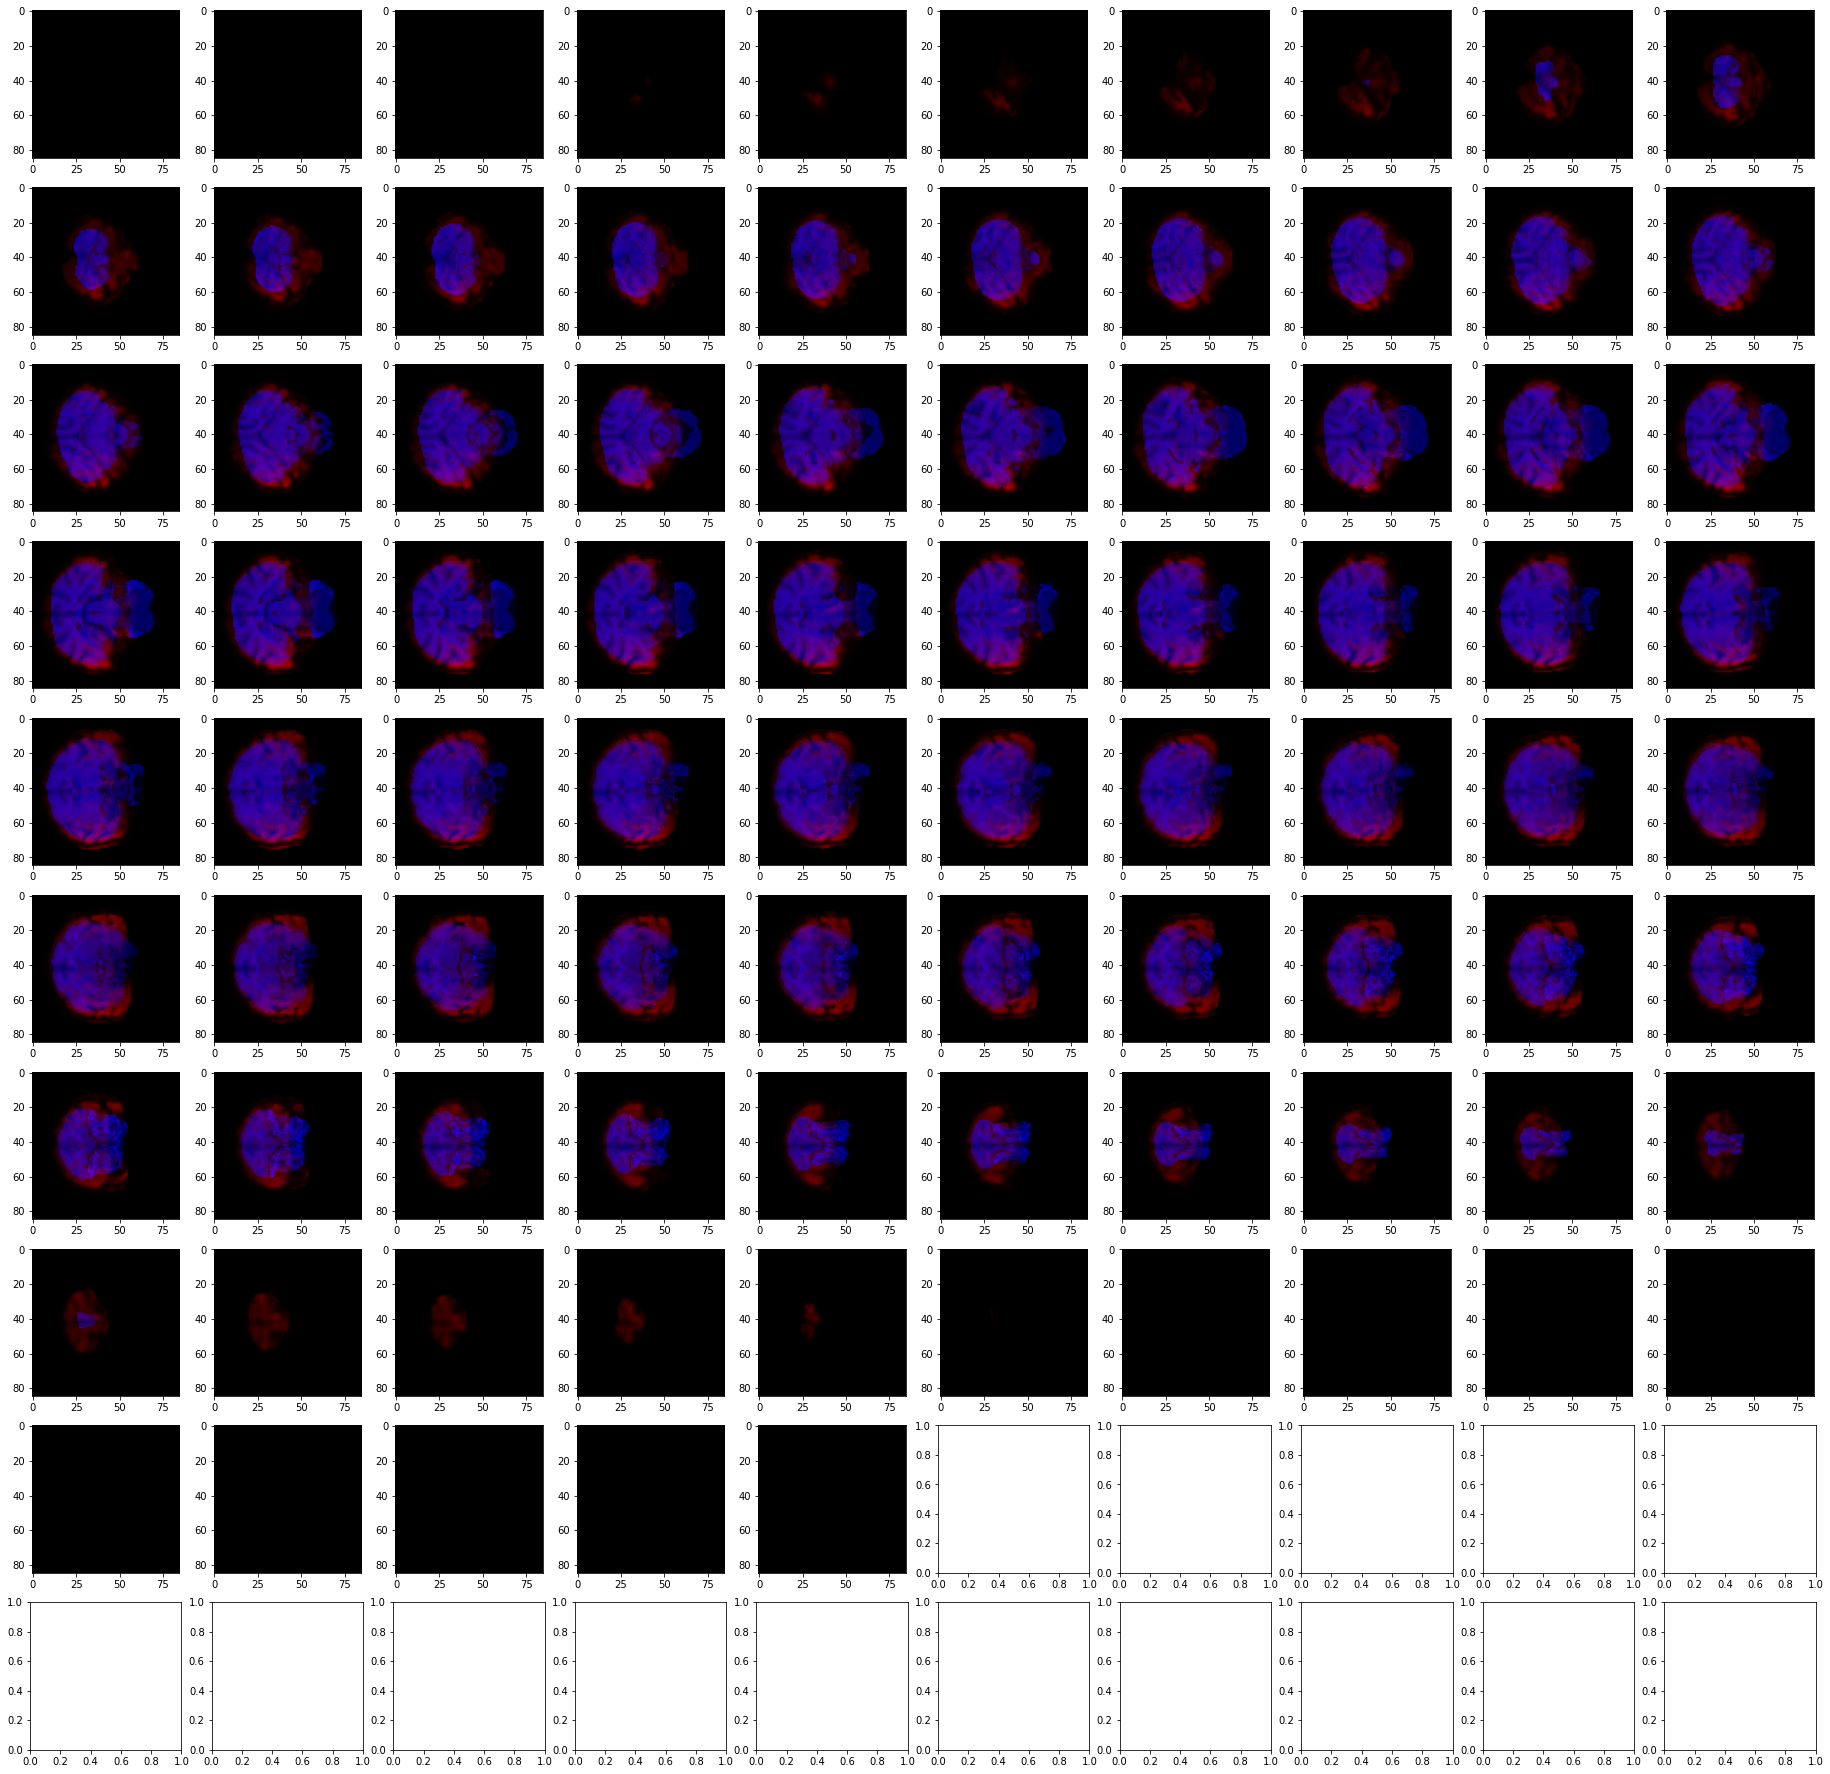

In [10]:
import nibabel as nib
func_nii = nib.load(os.path.join(SOURCE[0], 'registered.nii.gz'))
func_data = np.array(func_nii.get_fdata())
func_data = np.mean(func_data, axis=3) # average across time
num_plots = int(np.ceil(np.sqrt(func_data.shape[2])))

func_data = np.stack([func_data, np.zeros(func_data.shape), np.zeros(func_data.shape)], axis=3) # make red
anat_data = nib.load(os.path.join(ana_dir, 'stripped.nii.gz'))
anat_data = np.array(anat_data.get_fdata())
anat_data = np.stack([np.zeros(anat_data.shape), np.zeros(anat_data.shape), anat_data], axis=3) # make blue

overlay = _normalize_array(func_data) * .5 + _normalize_array(anat_data)
overlay = (overlay / max(overlay.flatten()))
fig, ax = plt.subplots(num_plots, num_plots, figsize=(32, 32))
for i in range(num_plots):
    for j in range(num_plots):
        try:
            ax[i, j].imshow(overlay[:, :, i*num_plots + j])
        except IndexError:
            continue
fig.show()

Normalize the functional data:

In [11]:
normalize(SOURCE, output=None, fname='registered.nii.gz')

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 16384
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  4  85  85  85 256   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [-1.  1.  1.  1.  2.  1.  1.  1.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'6.0.5:9e026117'
aux_file        : b''
qform_code      : unknown
sform_code      : aligned
quatern_b       : 0.0
quatern_c       : 0.70710677
quatern_d       : -0.70710677
qoffset_x       : 116.09509
qoffset_y       : -115.18523
qoffset_z       : 143

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 16384
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  4  85  85  85 256   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [-1.  1.  1.  1.  2.  1.  1.  1.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'6.0.5:9e026117'
aux_file        : b''
qform_code      : unknown
sform_code      : aligned
quatern_b       : 0.0
quatern_c       : 0.70710677
quatern_d       : -0.70710677
qoffset_x       : 116.09509
qoffset_y       : -115.18523
qoffset_z       : 143

## Begin Analysis ##
The contrast based analysis follows the following steps. 
- first the contrast matrix is specified. Each row is an independent contrast. The values  indicate the wieght on the different conditions (as listed in the paradigm file). In this paradigm file, index 0 is background, 1 is horizontal, and 2 is vertical. Thus the contrast specified in row one compares verticle and horizontal.
- the intras_subject_contrast function creates a design matrix and preforms LinearRegression between the design matrix and the functional data.
- The design matrix is created by taking the stimul sequence, one-hot encoding it and convolving it with estimated hemodynmic response functions in order to obtain expected bold signal along each independent channel
- A GLM can then take the whole design matrix as input, and fit to the observed MRI data. The coefficients of the fit GLM will represent the correlation between a voxels activity and the expectred activity for a stimuli along each channel. sklearns highly optimized GLM estimator is used here.
- The final contrasts can be obtained by simple matrix multiplication of the coefficient matrix with the contrast matrix, since this equates to summing across conditions with our desired weights. 

In [ ]:
desired_contrast_mat = np.array([[0, -1, 1],
                                [-1, .5, .5]]).T
contrast_desc = ['vertical_vs_horizontal', 'null_vs_avg_vert_horiz']
res = intra_subject_contrast(run_dirs=SOURCE, 
                             paradigm_file=os.path.join(root, 'stimuli/meridian_mapper_order1.para'), 
                             contrast_matrix=desired_contrast_mat, 
                             contrast_descriptors=contrast_desc, 
                             output_dir=os.path.join(root, 'analysis_out'),
                             fname='normalized.nii',)

## creating contrast overlay ##
create_contrast_surface reshapes the contrast volumes to match the original high resolution anatomical scan, them projects it onto the white matter surface computed in the anatomical pipline. This generates and overlay in the analysis_out folder that can be applied to any of the surfaces. 

In [3]:
create_contrast_surface(anatomical_white_surface='castor_test/surf/lh.white',
                        contrast_vol_path='castor_test/analysis_out/condition_vertical_vs_horizontal_contrast.nii',
                        orig_low_res_anatomical='castor_test/mri/stripped.nii.gz',
                        orig_high_res_anatomical='castor_test/mri/orig.mgz',
                        hemi='lh', subject_id='castor_test')

210915-14:22:13,819 nipype.interface WARNING:
	 Creating nii file with extension .nii: upsampled_contrast_surface_castor_test.nii
210915-14:22:13,975 nipype.interface INFO:
	 stdout 2021-09-15T14:22:13.975222:srcvol = /Users/loggiasr/Projects/fmri/monkey_fmri/castor_test/analysis_out/upsampled_contrast.nii
210915-14:22:13,976 nipype.interface INFO:
	 stdout 2021-09-15T14:22:13.975222:srcreg unspecified
210915-14:22:13,977 nipype.interface INFO:
	 stdout 2021-09-15T14:22:13.975222:srcregold = 0
210915-14:22:13,977 nipype.interface INFO:
	 stdout 2021-09-15T14:22:13.975222:srcwarp unspecified
210915-14:22:13,978 nipype.interface INFO:
	 stdout 2021-09-15T14:22:13.975222:surf = inflated
210915-14:22:13,978 nipype.interface INFO:
	 stdout 2021-09-15T14:22:13.975222:hemi = lh
210915-14:22:13,979 nipype.interface INFO:
	 stdout 2021-09-15T14:22:13.975222:ProjFrac = 0.5
210915-14:22:13,980 nipype.interface INFO:
	 stdout 2021-09-15T14:22:13.975222:thickness = thickness
210915-14:22:13,980 nip